In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("../artifacts/raw/train.csv")

In [4]:
data.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
data.shape

(29020, 20)

In [9]:
data["arrival_year"].unique()

array([2017, 2018])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            29020 non-null  int64  
 1   Booking_ID                            29020 non-null  object 
 2   no_of_adults                          29020 non-null  int64  
 3   no_of_children                        29020 non-null  int64  
 4   no_of_weekend_nights                  29020 non-null  int64  
 5   no_of_week_nights                     29020 non-null  int64  
 6   type_of_meal_plan                     29020 non-null  object 
 7   required_car_parking_space            29020 non-null  int64  
 8   room_type_reserved                    29020 non-null  object 
 9   lead_time                             29020 non-null  int64  
 10  arrival_year                          29020 non-null  int64  
 11  arrival_month  

In [39]:
data.drop(columns=["Booking_ID","Unnamed: 0"],inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [41]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [42]:
categorical=data.select_dtypes(include=["object"])
numerical=data.select_dtypes(include=["number"])

In [43]:
data["booking_status"].value_counts()

booking_status
Not_Canceled    19551
Canceled         9469
Name: count, dtype: int64

In [61]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [45]:
df=data.copy()

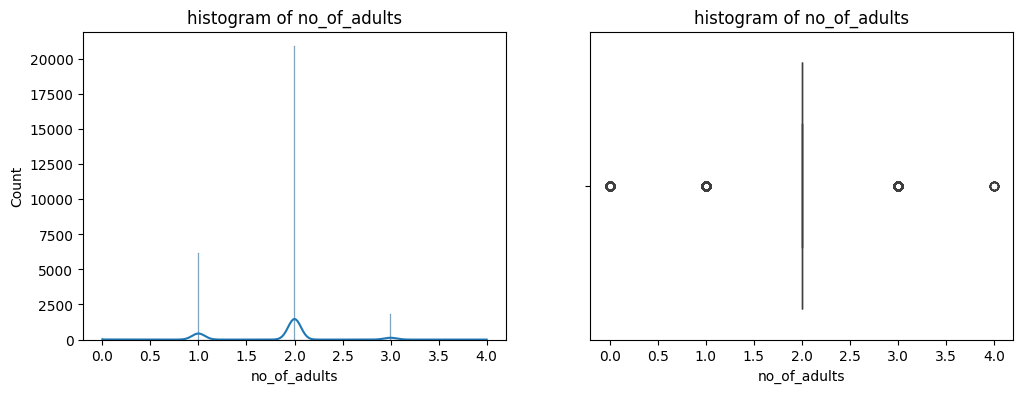

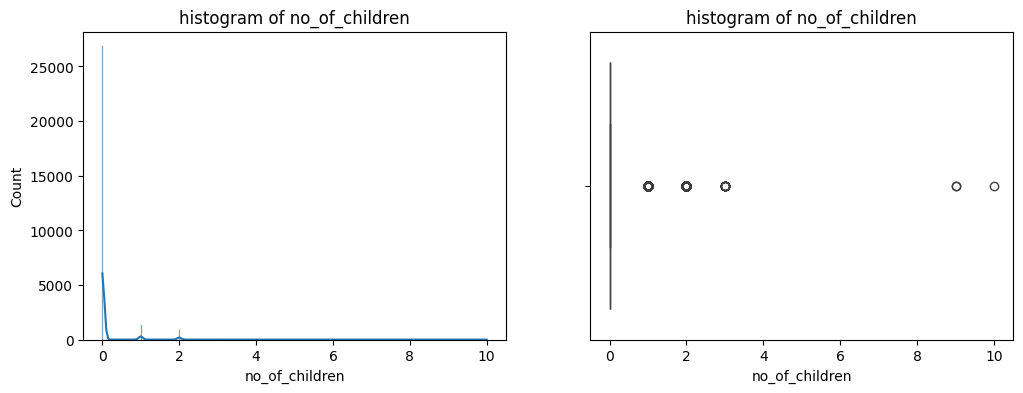

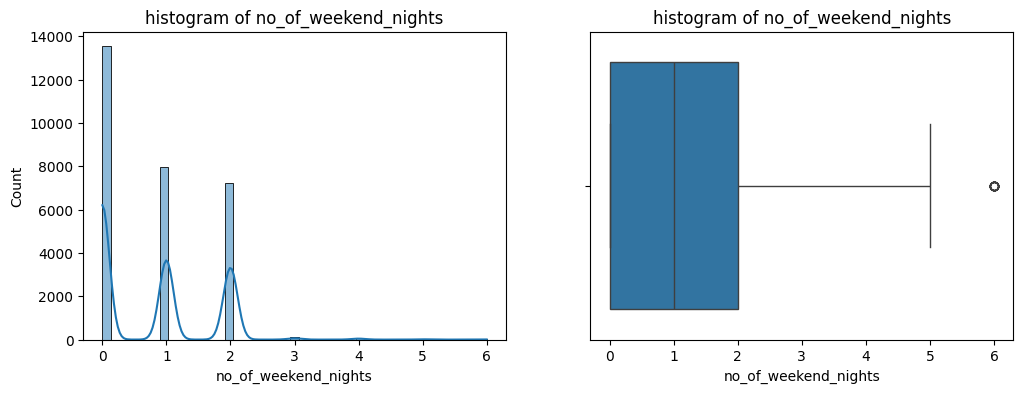

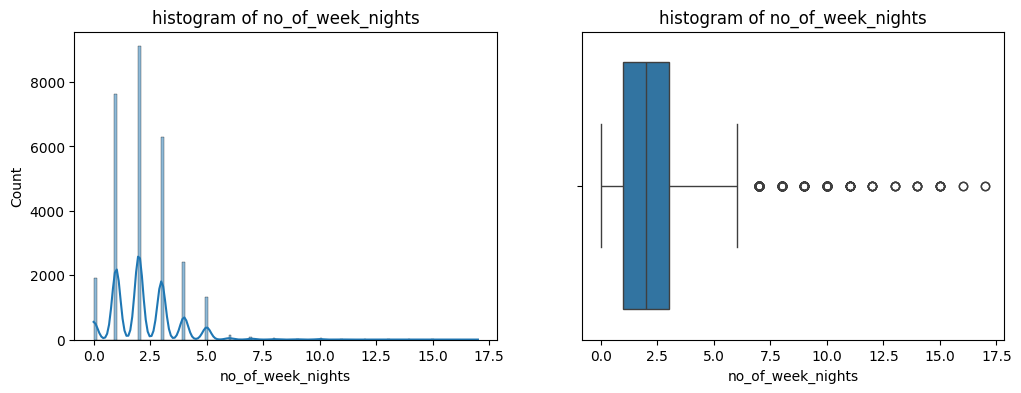

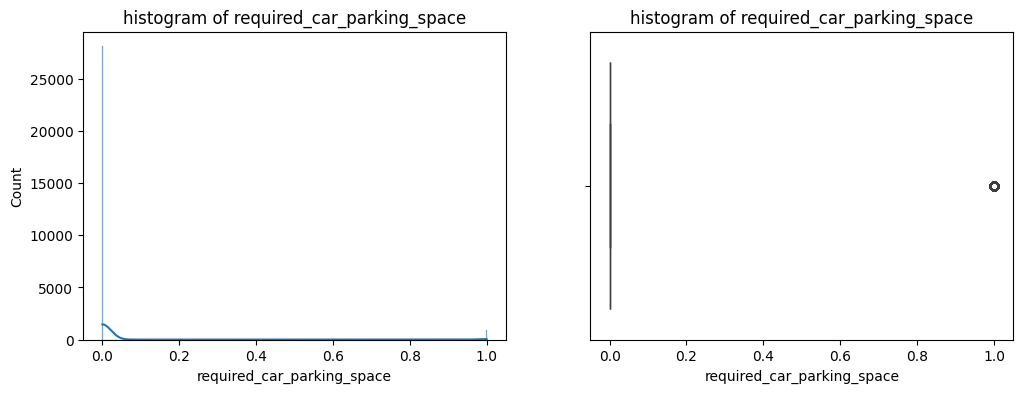

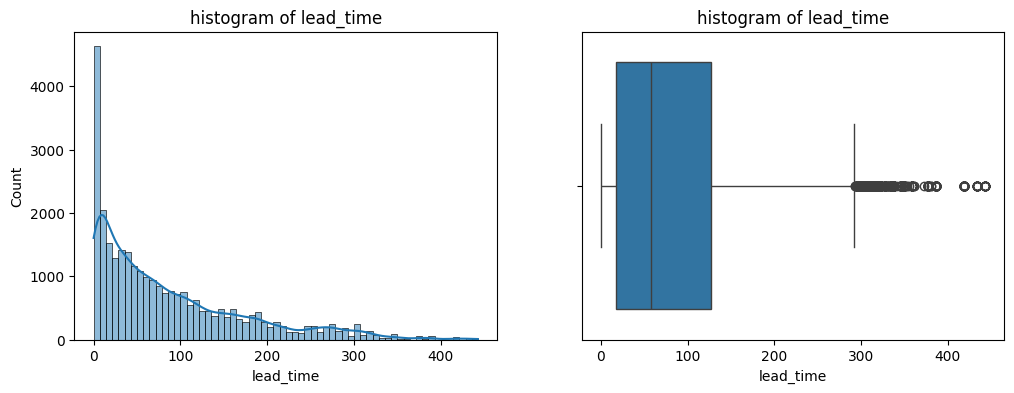

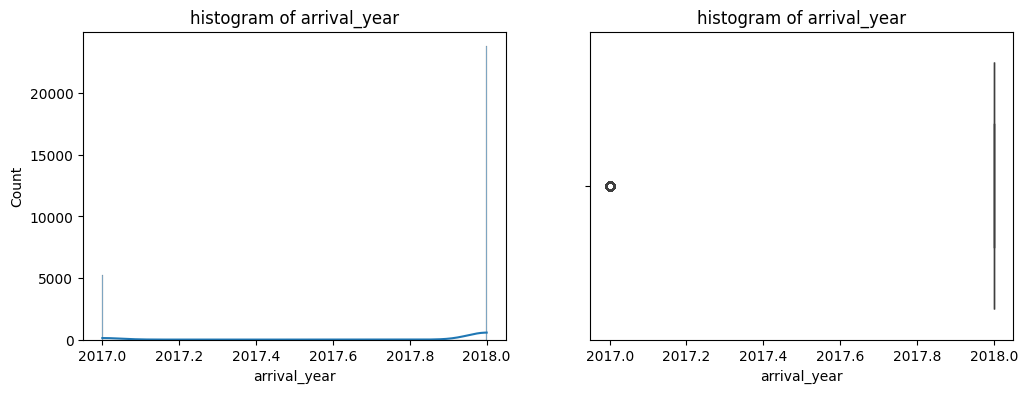

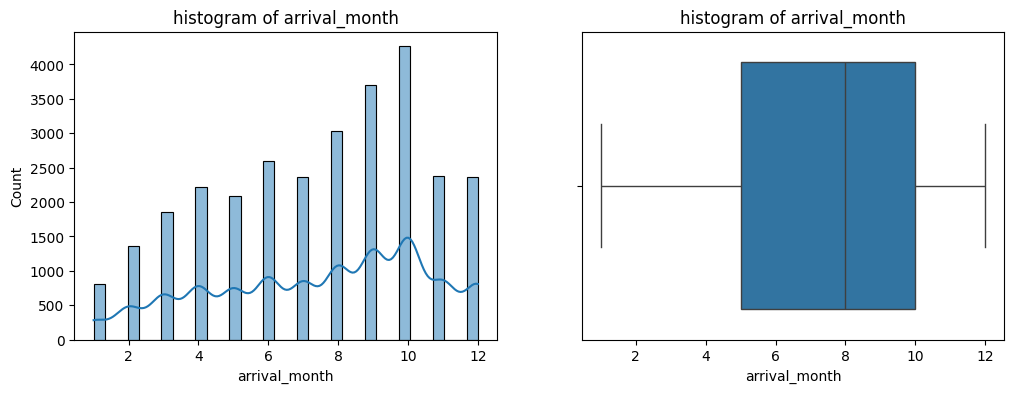

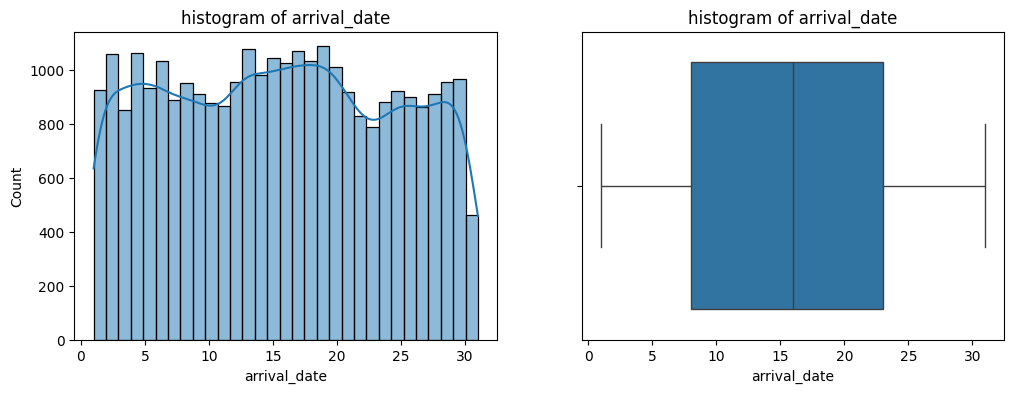

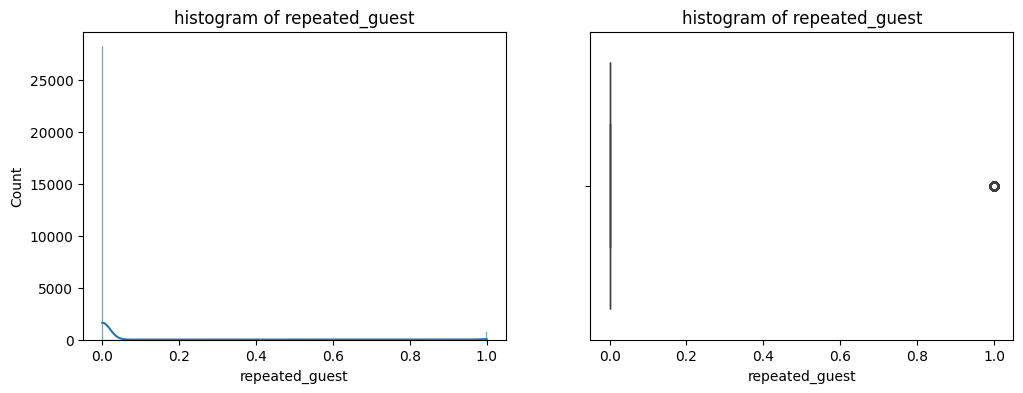

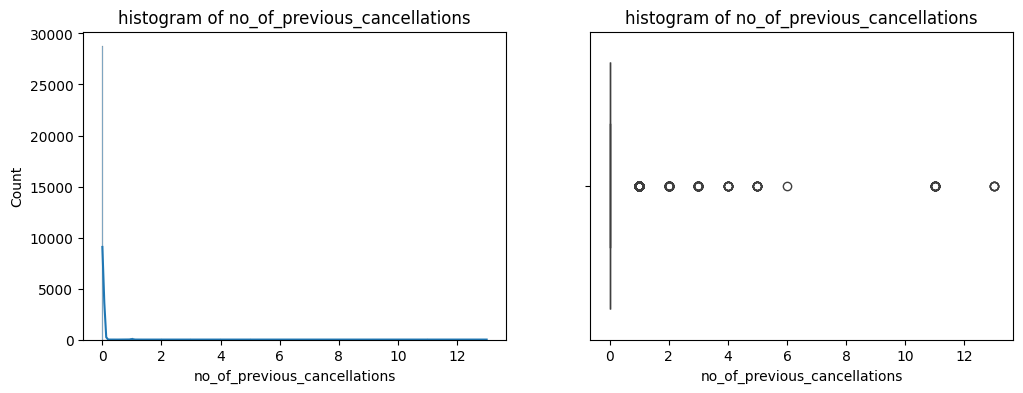

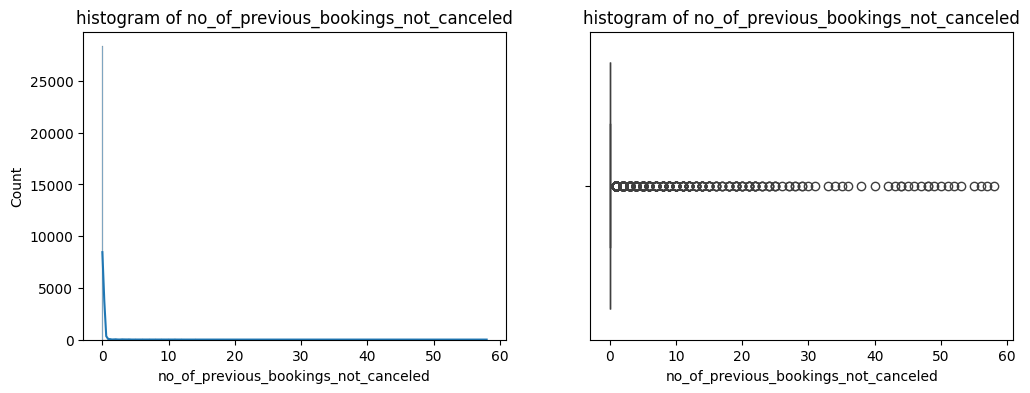

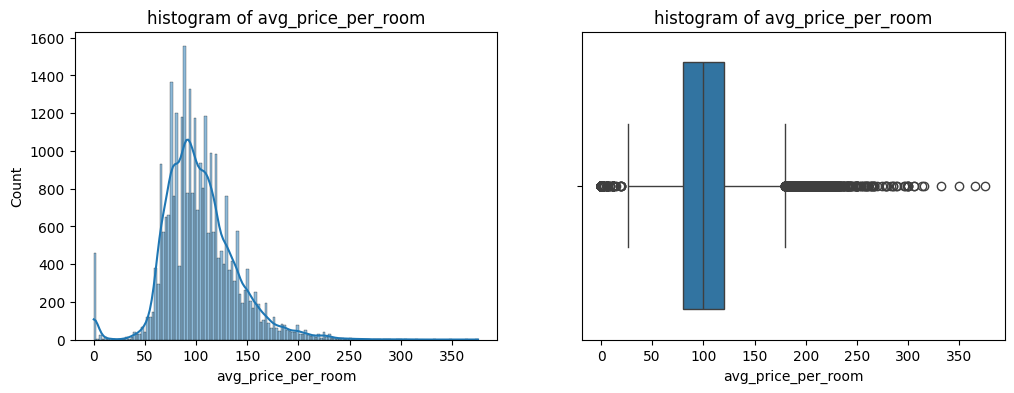

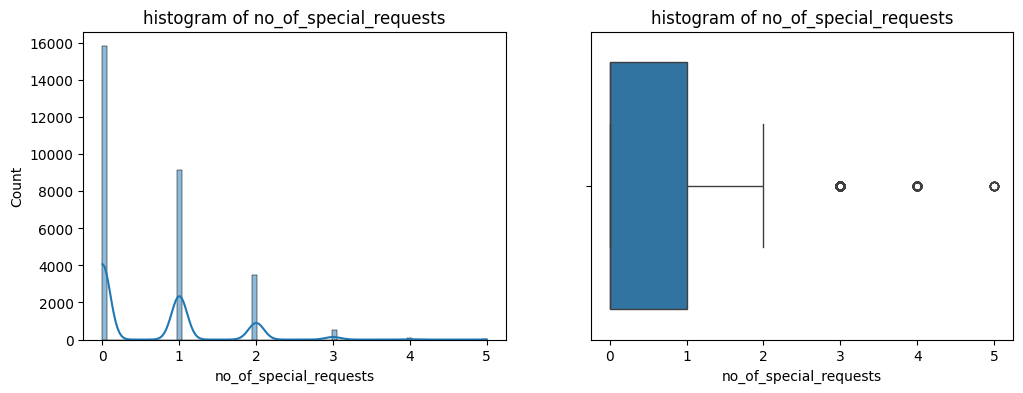

In [48]:
for col in numerical:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(x=df[col],kde=True)
    plt.title(f"histogram of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"histogram of {col}")

    
    plt.show()

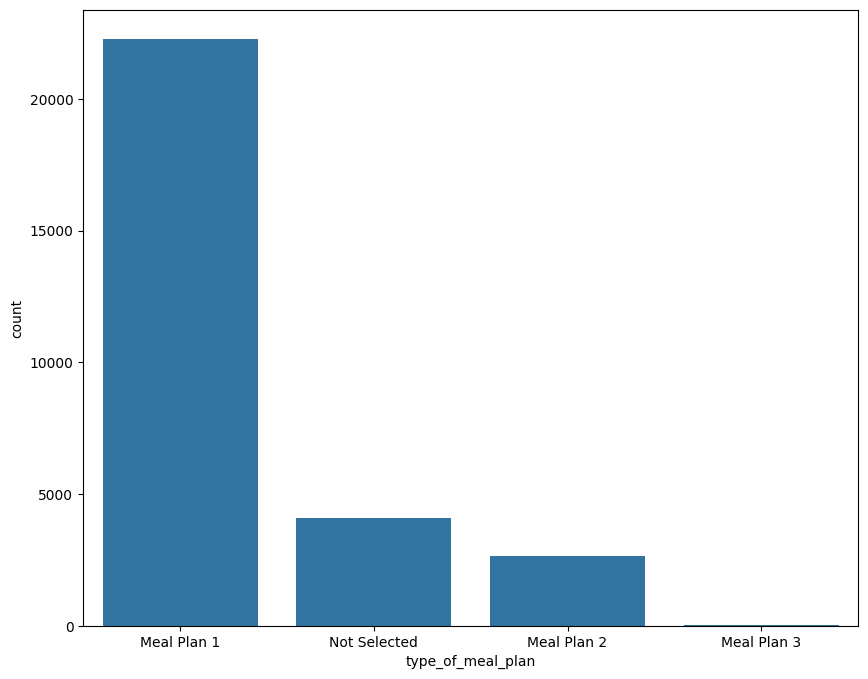

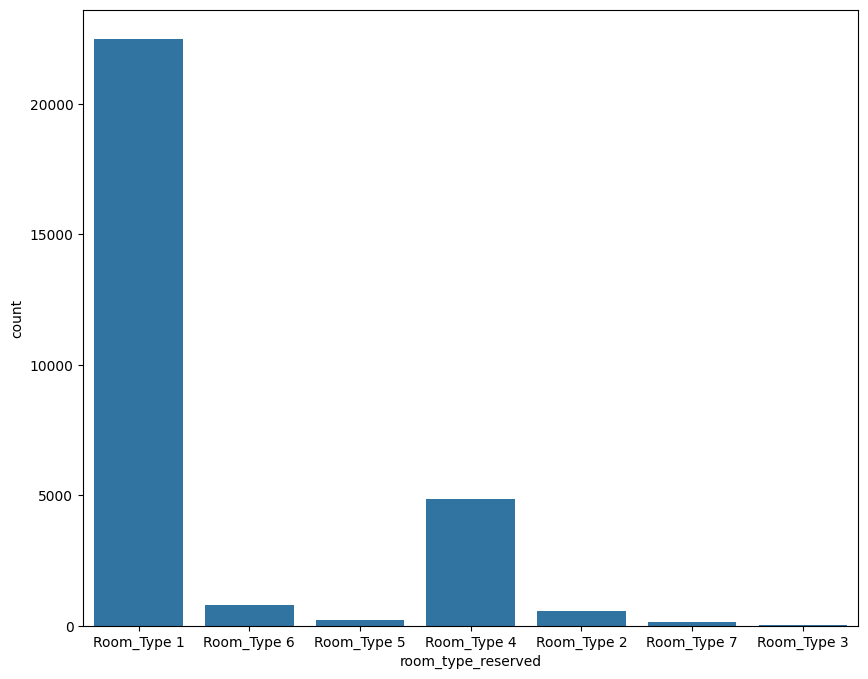

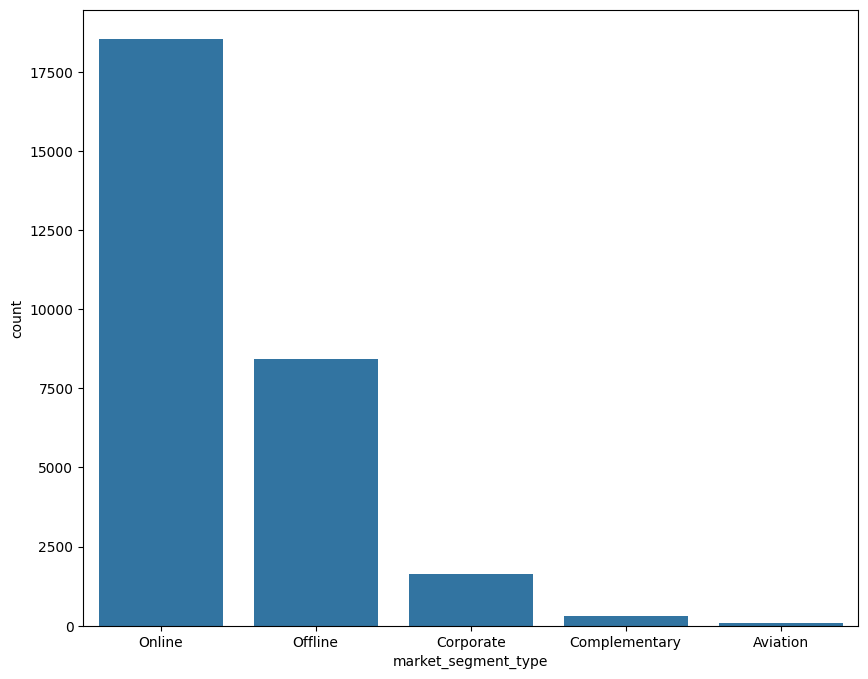

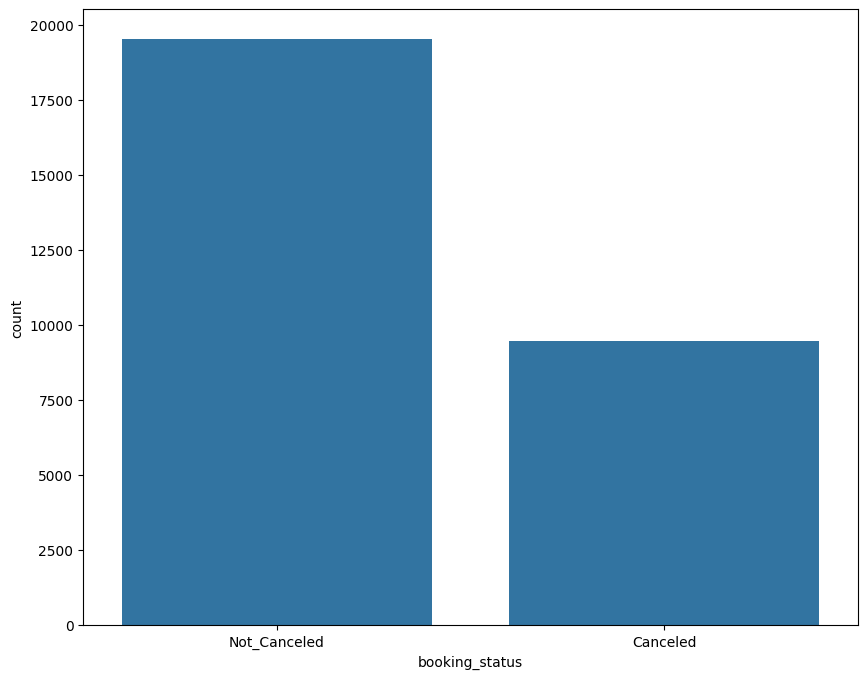

In [49]:
for col in categorical:
    plt.figure(figsize=(10,8))
    sns.countplot(x=df[col])
    plt.show()

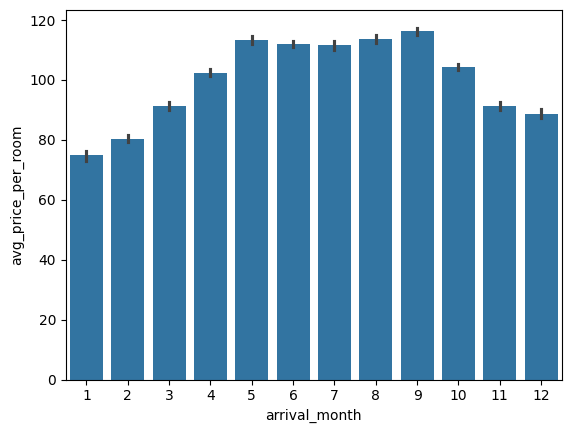

In [53]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [57]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_26120\2256793722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
C:\Users\madhu\AppData\Local\Temp\ipykernel_26120\2256793722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
C:\Users\madhu\AppData\Local\Temp\ipykernel_26120\2256793722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
C:\Users\madhu\AppData\Local\Temp\

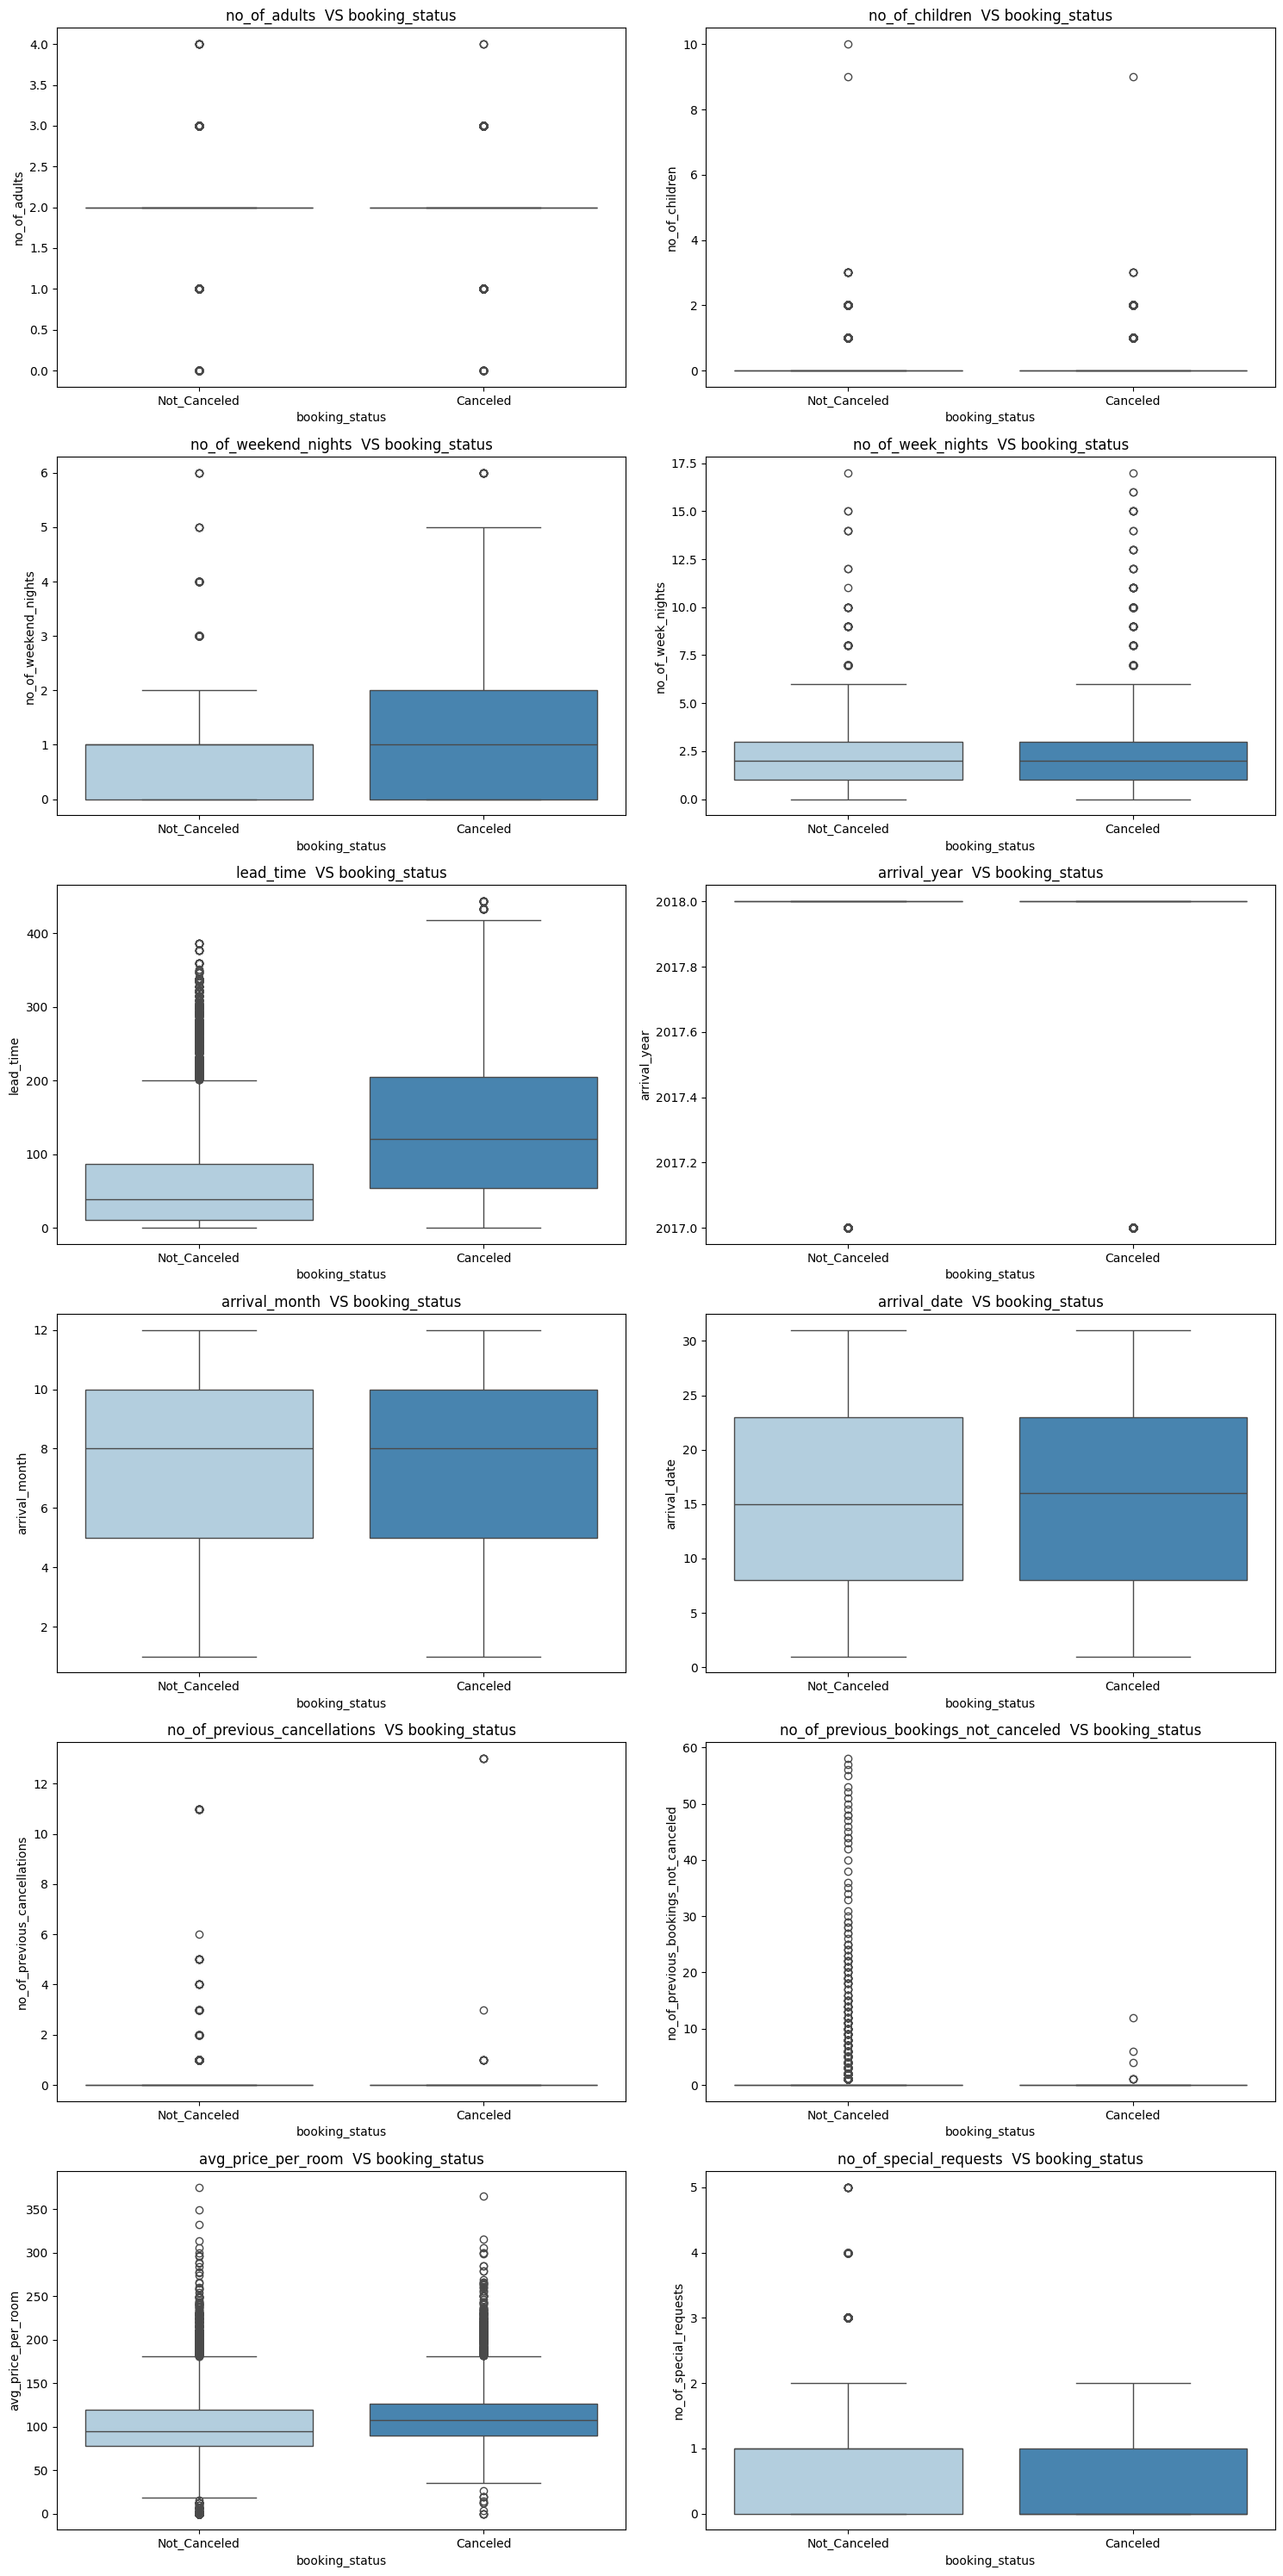

In [62]:
plot_bivariate_num(data , 'booking_status' , num_cols)

In [63]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

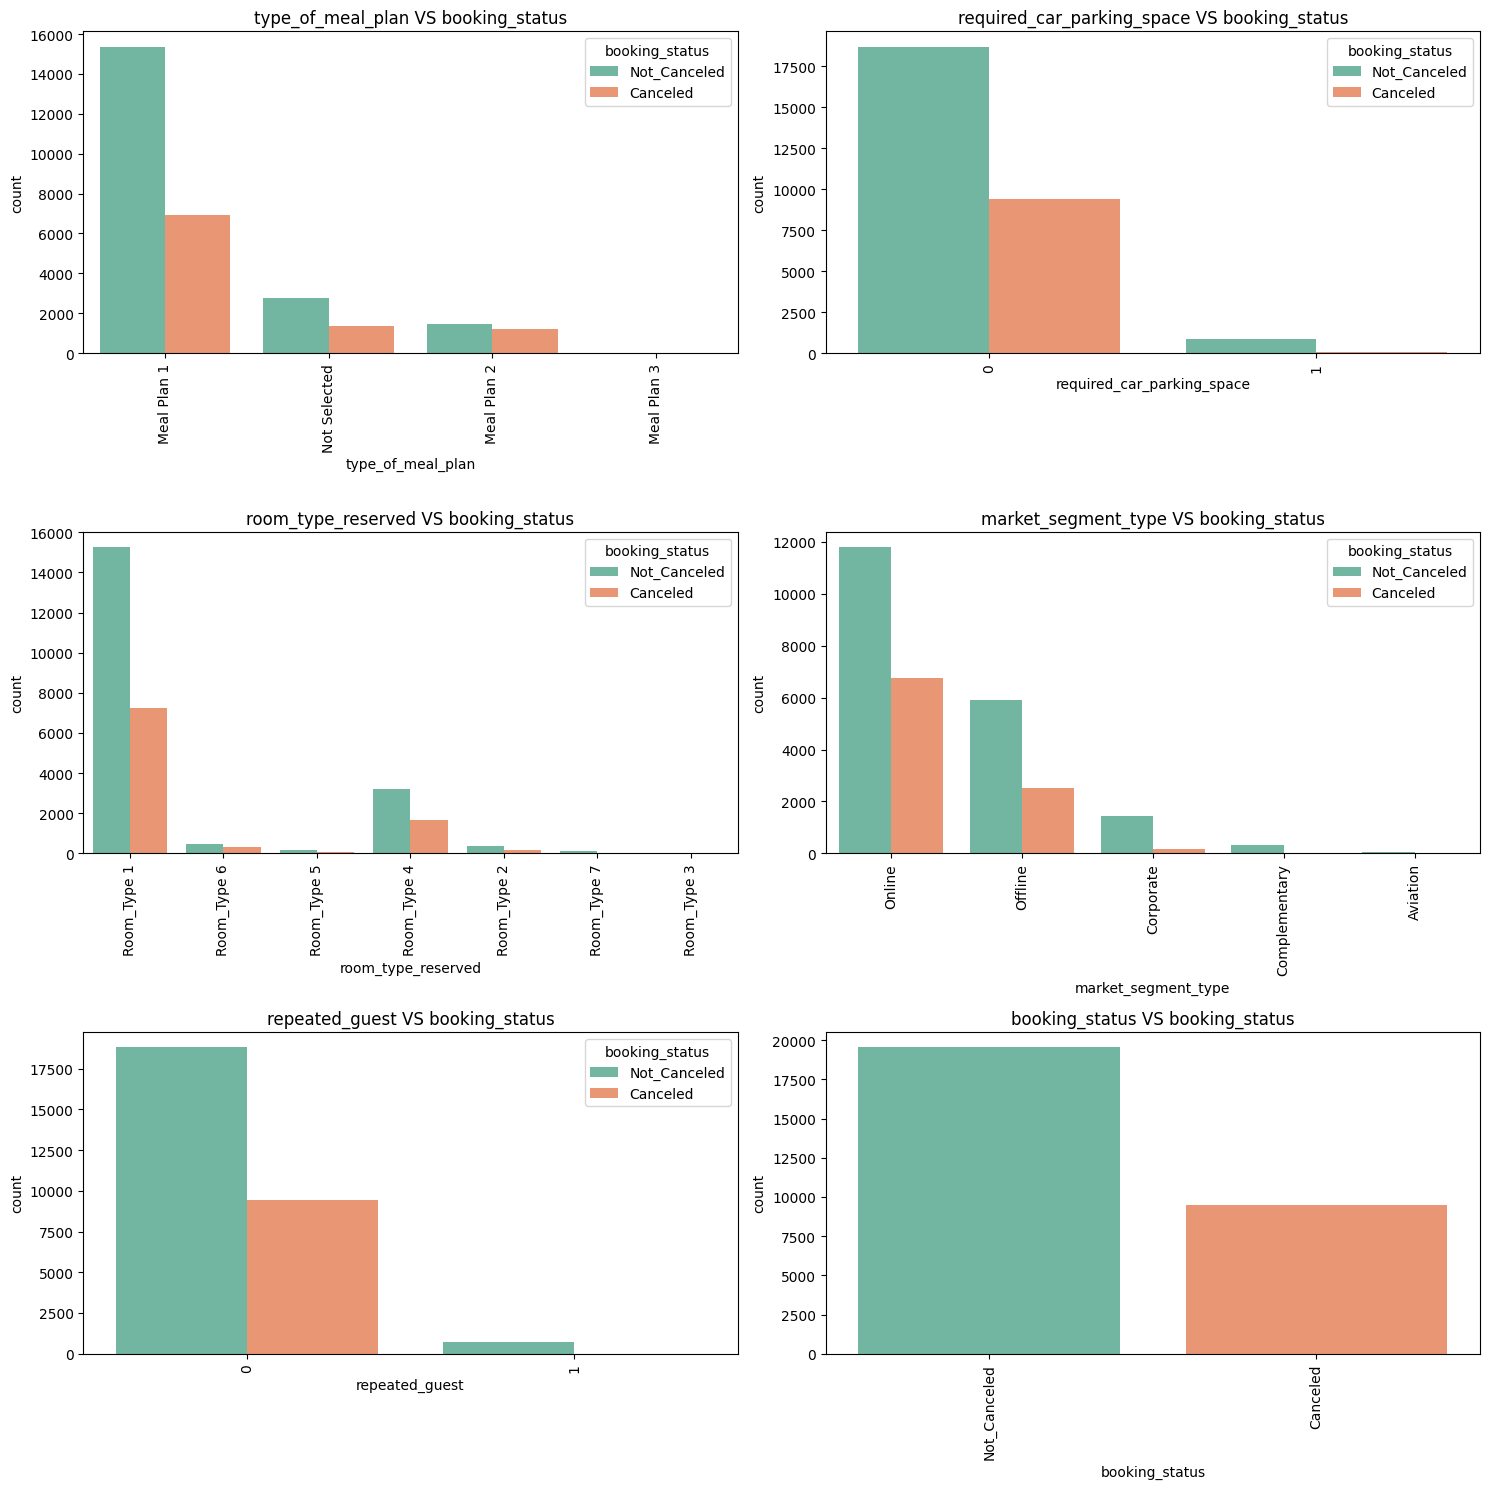

In [64]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

In [65]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()

In [ ]:
for col in categorical:
    df[col]=le.fit_transform(df[col])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  int64  
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  int64  
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [70]:
corr=df.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.023206,0.105348,0.107088,0.025929,0.012601,0.270178,0.096849,0.076599,0.018676,0.021653,0.311844,-0.193910,-0.047723,-0.119168,0.298806,0.186752,-0.091468
no_of_children,-0.023206,1.000000,0.029363,0.027730,-0.085639,0.031156,0.359788,-0.046830,0.049156,-0.003387,0.028185,0.135077,-0.036217,-0.016429,-0.021245,0.339916,0.126538,-0.030347
no_of_weekend_nights,0.105348,0.029363,1.000000,0.170348,-0.027533,-0.034955,0.058160,0.044089,0.052698,-0.011612,0.029413,0.127151,-0.066445,-0.020146,-0.027981,-0.007783,0.059582,-0.056956
no_of_week_nights,0.107088,0.027730,0.170348,1.000000,-0.078791,-0.051730,0.095343,0.154032,0.036798,0.037856,-0.007459,0.111961,-0.097529,-0.029076,-0.044622,0.024255,0.045760,-0.093921
type_of_meal_plan,0.025929,-0.085639,-0.027533,-0.078791,1.000000,-0.015095,-0.208296,-0.064028,0.069515,0.008640,0.005035,0.204802,-0.066835,-0.016406,-0.038117,-0.066362,0.020935,-0.027236
required_car_parking_space,0.012601,0.031156,-0.034955,-0.051730,-0.015095,1.000000,0.036740,-0.069882,0.021166,-0.017233,-0.003162,-0.004110,0.117608,0.026509,0.071711,0.059450,0.091292,0.090892
room_type_reserved,0.270178,0.359788,0.058160,0.095343,-0.208296,0.036740,1.000000,-0.106759,0.105152,-0.004403,0.028684,0.157289,-0.027335,-0.008770,-0.012025,0.472436,0.141985,-0.023396
lead_time,0.096849,-0.046830,0.044089,0.154032,-0.064028,-0.069882,-0.106759,1.000000,0.141433,0.134737,0.002029,-0.008181,-0.138162,-0.045136,-0.078447,-0.064011,-0.101831,-0.434425
arrival_year,0.076599,0.049156,0.052698,0.036798,0.069515,0.021166,0.105152,0.141433,1.000000,-0.339353,0.016373,0.149341,-0.017384,0.005358,0.026980,0.176304,0.058387,-0.173351
arrival_month,0.018676,-0.003387,-0.011612,0.037856,0.008640,-0.017233,-0.004403,0.134737,-0.339353,1.000000,-0.043967,-0.009681,0.005575,-0.037577,-0.005398,0.056038,0.108712,0.012487


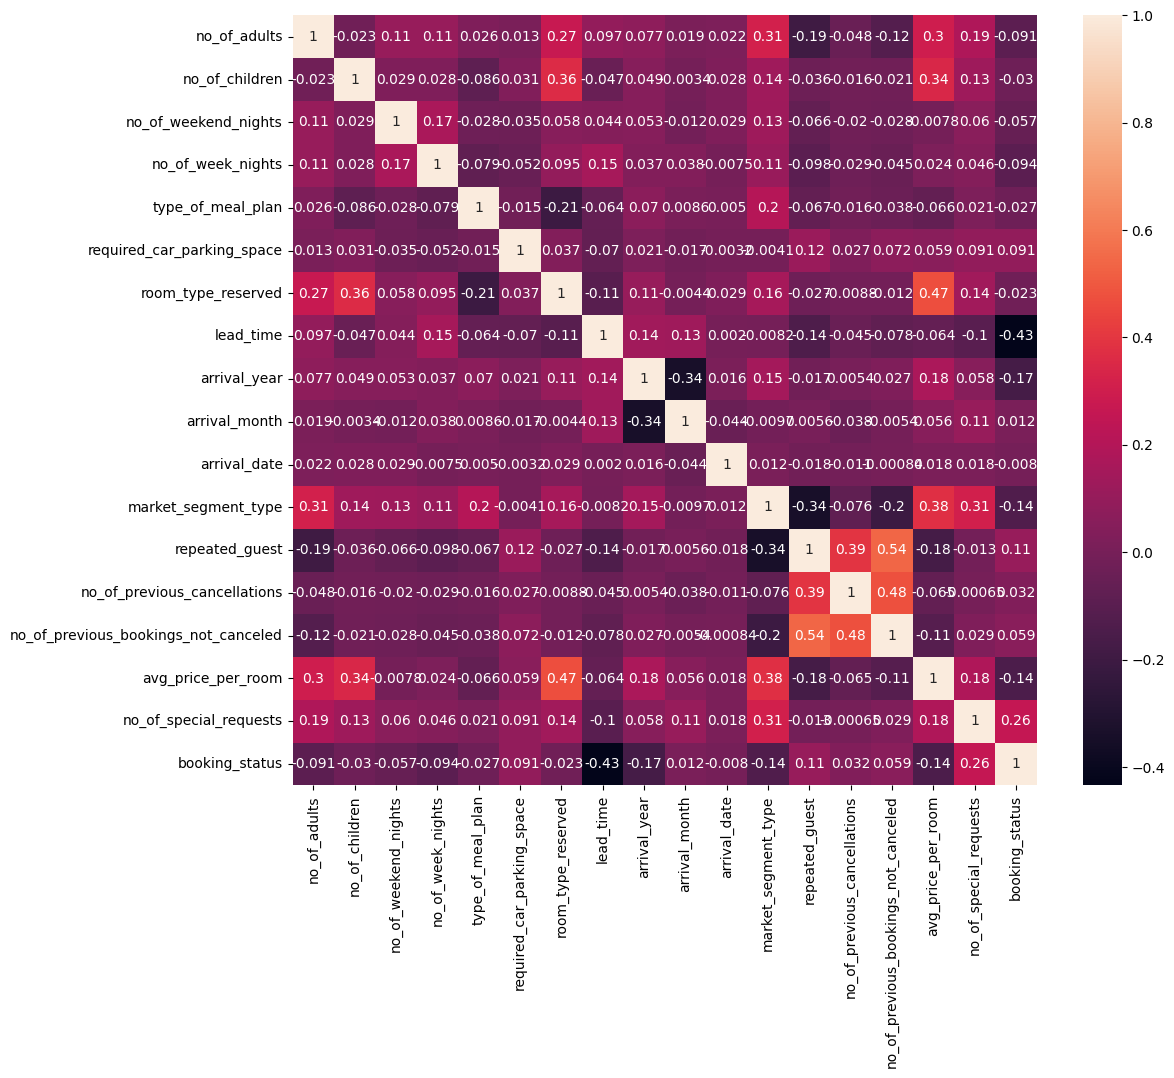

In [72]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [73]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [74]:
y.value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [75]:
from imblearn.over_sampling import SMOTE

In [113]:
smote=SMOTE(random_state=42)
X, y =smote.fit_resample(X,y)

In [115]:
y.value_counts()


booking_status
1    19551
0    19551
Name: count, dtype: int64

In [82]:
X_res.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score

In [92]:
rfc=RandomForestClassifier(random_state=42,oob_score=True)

In [93]:
rfc.fit(X_res,y_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [96]:
print("OOB Score:", rfc.oob_score_)


OOB Score: 0.9196716280497161


In [98]:
from sklearn.model_selection import train_test_split

In [101]:
X_res.shape

(39102, 17)

In [102]:
y_res.shape

(39102,)

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42,stratify=y_res)

In [107]:
model=RandomForestClassifier(random_state=42,oob_score=True)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [110]:
y_pred=model.predict(X_test)

In [111]:
accuracy=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [112]:
print(accuracy)
print(f1)

0.9205983889528193
0.9216601488583323


In [108]:
print("OOB Score:", model.oob_score_)


OOB Score: 0.9133659409865413
